In [1]:
import torch
import numpy as np

# 01. 파이토치 패키지 기본 구성
## 1. torch
- 메인 네임스페이스
- 텐서 등 다양한 수학 함수가 포함
- numpy와 유사한 구조 

(1) tensor 생성

In [4]:
data = [[1, 2], [3, 4]]
x = torch.tensor(data)
print(x)

tensor([[1, 2],
        [3, 4]])


(2) np배열에서 tensor 생성

In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]])


## 2. torch.autograd
- 자동 미분을 위한 함수들이 포함
- 자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)
- 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스(Function)가 포함 

In [ ]:
torch.autograd

## 3. torch.nn
- 신경망을 구축하기 위한 데이터 구조, 레이어가 정의되어있음 
- rnn, lstm layers
- relu 등 활성화 함수
- mseloss 등 손실함수

In [ ]:
torch.nn

## 4. torch.optim
- 확률적 경사 하강법(stochastic gradient descent, sgd)를 중심으로한 파라미터 최적화 알고리즘이 구현되어있다.

In [ ]:
torch.optim

## 5. torch.utils.data
- sgd의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어있다.

In [ ]:
torch.utils.data

## 6. torch.onnx
- ONNX(open neural network exchange)의 포맷으로 모델을 export할 때 사용
- ONNX : 서로 다른 딥러닝 프레임워크 간 모델을 공유할 때 사용하는 포맷 

# 02. 텐서 조작하기(Tensor Manipulation)
## 1. 벡터, 행렬, 텐서

딥러닝을 공부하면서 가장 많이 듣게 된 단위가 벡터, 행렬, 텐서였다. 각각 어떻게 다른지 개념을 정리해보고자 한다.      
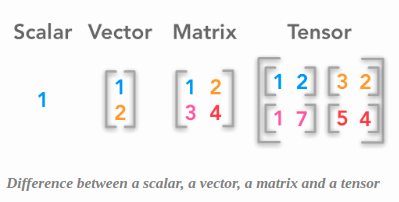  

1. 스칼라 : 하나의 숫자
2. 벡터 : 1차원으로 구성된 값, 스칼라(숫자)의 배열
3. 행렬 : 2차원으로 구성된 값
4. 텐서 : 3차원으로 구성된 값 

- 텐서
    - 텐서는 rank 0부터 rank n까지 있다.
    - 위에서 설명한 스칼라, 벡터, 행렬도 텐서로 표현할 수 있다.
    - 스칼라 : 0 rank 텐서
    - 벡터 : 1 rank 텐서
    - 행렬 : 2 rank 텐서

**reference**    
https://www.youtube.com/watch?v=m0qwxNA7IzI   
https://art28.github.io/blog/linear-algebra-1/

## 2. 넘파이로 텐서 만들기(벡터와 행렬 만들기)
### 벡터의 차원과 크기

In [6]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [7]:
print('Rank of t :', t.ndim)
print('Shape of t :', t.shape)

Rank of t : 1
Shape of t : (7,)


1차원, (1, 7) shape을 가진 벡터라는 것을 확인할 수 있다.

In [8]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [10]:
print('Rank of t :', t.ndim)
print('Shape of t :', t.shape)

Rank of t : 2
Shape of t : (4, 3)


2차원, (4, 3)shape을 가진 벡터를 볼 수 있다.

## 3. 파이토치 텐서
- 1차원 텐서

In [2]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [3]:
print('Rank of t :', t.dim())
print('Shape of t :', t.shape)
print('Size of t :', t.size())

Rank of t : 1
Shape of t : torch.Size([7])
Size of t : torch.Size([7])


- 인덱스 접근
- 슬라이싱

In [4]:
print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # 슬라이싱
print(t[:2], t[3:])       # 슬라이싱

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


- 2차원 텐서

In [5]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [6]:
print('Rank of t :', t.dim())
print('Shape of t :', t.shape)
print('Size of t :', t.size())

Rank of t : 2
Shape of t : torch.Size([4, 3])
Size of t : torch.Size([4, 3])


In [7]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # ↑ 위의 경우의 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


## 4. 연산
### 브로드캐스팅(Broadcasting)
- 행렬 연산시 두 행렬의 크기 혹은 첫 번째 차원이 일치해야한다.
- 연산을 위해 자동으로 크기를 맞춰주는 기능 : **브로드캐스팅** 

같은 크기일 때의 덧셈 연산

In [10]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


다른 크기일 때의 연산 : **브로드캐스팅**

In [11]:
m1 = torch.FloatTensor([[3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


### 행렬 곱셈(Matrix Multiplication) VS 곱셈(Multiplication)

In [12]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [13]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


### 평균(mean)

In [14]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


### 덧셈(sum)

In [15]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [16]:
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


### 최대(Max), 아그맥스(ArgMax)

In [17]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [18]:
print(t.max()) # Returns one value: max

tensor(4.)


In [19]:
print(t.max(dim=0)) # Returns two values: max and argmax

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [20]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


### 뷰(View)
- numpy reshape과 같은 역할
- 원소의 수를 유지하면서 텐서의 크기 변경

In [21]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [22]:
print('Rank of ft :', ft.dim())
print('Shape of ft :', ft.shape)
print('Size of ft :', ft.size())

Rank of ft : 3
Shape of ft : torch.Size([2, 2, 3])
Size of ft : torch.Size([2, 2, 3])


- 2차원으로 변경

In [23]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


(2, 2, 3) -> (4, 3) 으로 자동 Reshape
- 차원 유지, 크기 변경

In [24]:
print(ft.view([-1, 1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### 스퀴즈(Squeeze)
- 1인 차원 제거

In [25]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [26]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### 언스퀴즈(Unsqueeze)
- 특정 위치에 1인 차원을 추가

In [27]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [28]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [29]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### 타입 캐스팅(Type Casting)
- 자료형 변환

In [30]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [31]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [32]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [33]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


###  concatenate, torch.cat

In [34]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

dim인자를 이용할 수 있다.

In [35]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [36]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


### 스택킹(Stacking)
- 보다 편리하게 쌓는 방법

In [37]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [38]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [39]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [40]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


### ones_like, zeros_like

In [41]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [42]:
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [43]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 덮어쓰기 연산 (inplace)

In [44]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [45]:
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


- 연산 뒤에 _ 를 붙이면 된다.

In [46]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


# 03. 파이썬 클래스(class)
- 파이토치에서는 클래스를 이용해서 구현하는 경우가 많다.
- 복습!

In [47]:
result = 0  # 전역(global)변수

In [48]:
def add(num):  # 함수
    global result
    result += num
    return result

In [49]:
print(add(3))
print(add(4))

3
7


In [50]:
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


- 위처럼 두 개의 함수로 두 연산을 할 수 있지만, 이 과정을 클래스로 구현할 수 있다.

In [51]:
class Calculator:
    def __init__(self): # 객체 생성 시 호출될 때 실행되는 초기화 함수. 이를 생성자라고 한다.
        self.result = 0

    def add(self, num): # 객체 생성 후 사용할 수 있는 함수.
        self.result += num
        return self.result

In [52]:
cal1 = Calculator() # 객체 생성 (클래스를 상속받는)

In [53]:
cal2 = Calculator()

In [54]:
print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


1. 클래스 구현
2. 객체를 별도로 생성

위의 과정을 통해 간결하게 구현할 수 있었다.